In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("Insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Categorical Columns
- sex
- smoker
- region

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

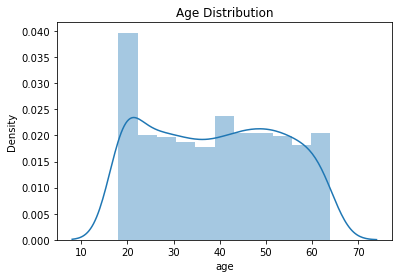

In [8]:
#age
sns.distplot(df['age'])
plt.title("Age Distribution")

There are higher number of people having age 18 to 23.

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

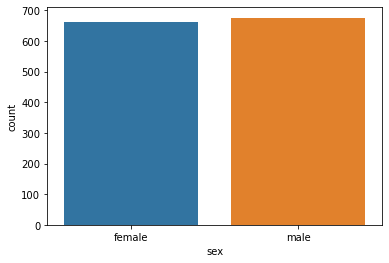

In [9]:
#sex column
sns.countplot(df['sex'])

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

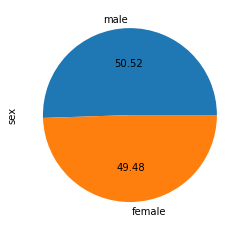

In [11]:
df['sex'].value_counts().plot(kind='pie', autopct='%0.2f')

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

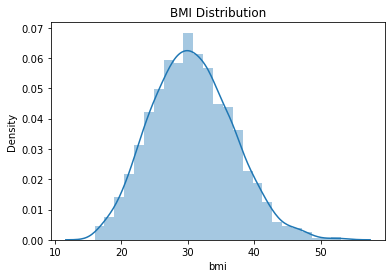

In [12]:
#bmi
sns.distplot(df['bmi'])
plt.title("BMI Distribution")

- Althogh normally BMI ranges between 18.5 and 24.9.
- In this data higher number of people are having bmi ranges between 24 and 37

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Children Distribution')

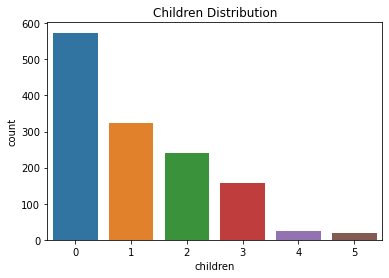

In [13]:
#children
sns.countplot(df['children'])
plt.title("Children Distribution")

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Smoker Distribution')

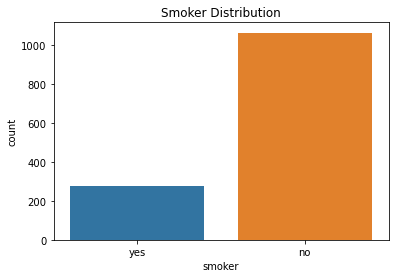

In [15]:
#smoker
sns.countplot(df['smoker'])
plt.title("Smoker Distribution")

<AxesSubplot:ylabel='smoker'>

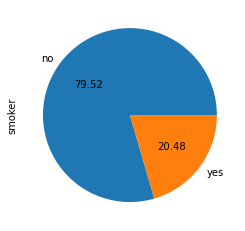

In [16]:
df['smoker'].value_counts().plot(kind='pie', autopct='%0.2f')

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

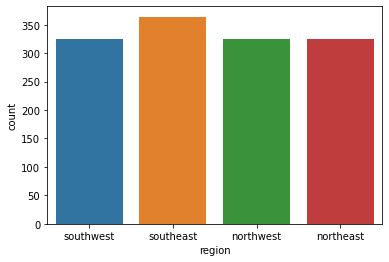

In [17]:
#region
sns.countplot(df['region'])

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

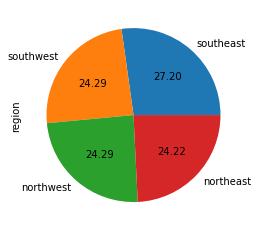

In [19]:
df['region'].value_counts().plot(kind='pie', autopct='%0.2f')

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

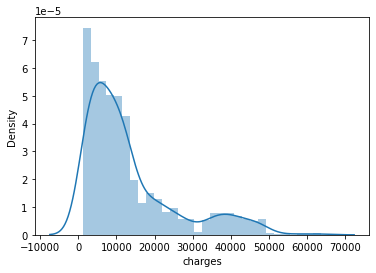

In [20]:
#charges
sns.distplot(df['charges'])

# 

# Data preprocessing

In [21]:
#encoding categorical columns

In [22]:
#sex column
df.replace({'sex': {'male': 0, 'female':1}}, inplace=True)

#smoker column
df.replace({'smoker': {'yes': 1, 'no':0}}, inplace=True)

#region column
df.replace({'region': {'southwest': 0, 'southeast':1, 'northwest': 2, 'northeast':3}}, inplace=True)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


# Splitting data

In [24]:
X = df.iloc[:,0:6]

In [25]:
y = df.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


# Model Training

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
train_pred = reg.predict(X_train)

In [31]:
r2_score(y_train, train_pred)

0.7519923667088932

In [32]:
test_pred = reg.predict(X_test)

In [33]:
r2_score(y_test, test_pred)

0.7445422986536503

# Predictive Analysis

In [34]:
age = int(input("Enter your Age: "))
sex = int(input("Enter your Gender: \n 0:Male or 1:Female "))
bmi = float(input("Enter your BMI: "))
children = int(input("Enter how many children you have: " ))
smoker = int(input("Are you smoker:1 or non-smoker:0 \n"))
region = int(input("Enter you region : \n 'southwest': 0, 'southeast':1, 'northwest': 2, 'northeast':3 \n"))
    
input_data = np.asarray([age, sex, bmi, children, smoker, region]).reshape(1,-1)
        
    
prediction = reg.predict(input_data)
print("The predicted cost is USD : ", prediction[0])

Enter your Age: 18
Enter your Gender: 
 0:Male or 1:Female 0
Enter your BMI: 33.72
Enter how many children you have: 0
Are you smoker:1 or non-smoker:0 
1
Enter you region : 
 'southwest': 0, 'southeast':1, 'northwest': 2, 'northeast':3 
1
The predicted cost is USD :  27153.68531566288


C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
